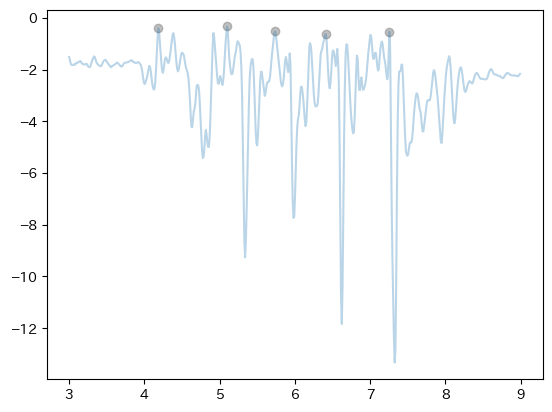

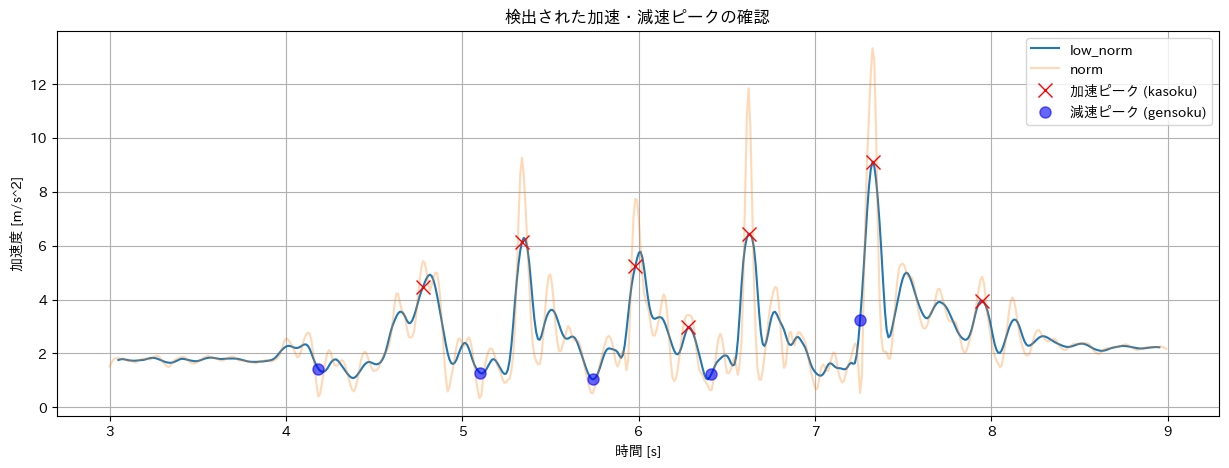

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja
from scipy.signal import find_peaks

acce_file_path = './PDR_1/Accelerometer.csv'
gyro_file_path = './PDR_1/Gyroscope.csv'

acce_data = pd.read_csv(acce_file_path,names=['timestamp','x','y','z'], header=0)
gyro_data = pd.read_csv(gyro_file_path,names=['timestamp','x','y','z'], header=0)

acce_data = acce_data[(acce_data['timestamp'] >= 3) & (acce_data['timestamp'] < 9)].reset_index(drop=True)
gyro_data = gyro_data[(gyro_data['timestamp'] >= 3) & (gyro_data['timestamp'] < 9)].reset_index(drop=True)

acce_data['norm'] = (acce_data['y']**2 + acce_data['z']**2)**0.5
acce_data['low_norm'] = acce_data['norm'].rolling(window=10, center=True).mean()

peak, _ = find_peaks(acce_data['norm'], height=3, distance=30)
gensoku_index, _ = find_peaks(-acce_data['norm'], height=-1.0, distance=30)

plt.plot(acce_data['timestamp'], -acce_data['norm'], label='-norm',alpha = 0.3)
plt.scatter(acce_data['timestamp'].iloc[gensoku_index], -acce_data['norm'].iloc[gensoku_index], marker='o', color='gray', alpha=0.5)

plt.show()


# --- ピーク検出の可視化 ---
plt.figure(figsize=(15, 5))
# Y軸とZ軸の加速度をプロット
plt.plot(acce_data['timestamp'], acce_data['low_norm'], label='low_norm')
plt.plot(acce_data['timestamp'], acce_data['norm'], label='norm',alpha = 0.3)


# 検出されたピークをプロット
# 加速ピーク (kasoku) を赤の×印で表示
plt.plot(acce_data['timestamp'].iloc[peak], 
         acce_data['low_norm'].iloc[peak], 
         "x", color='red', markersize=10, label='加速ピーク (kasoku)')

# 減速ピーク (gensoku) を青の○印で表示
plt.plot(acce_data['timestamp'].iloc[gensoku_index], 
         acce_data['low_norm'].iloc[gensoku_index], 
         "o", color='blue', markersize=8, alpha=0.6, label='減速ピーク (gensoku)')

plt.title('検出された加速・減速ピークの確認')
plt.xlabel('時間 [s]')
plt.ylabel('加速度 [m/s^2]')
plt.grid(True)
plt.legend()
plt.show()